In [1]:
import pandas as pd

# Create dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/EgorDudyrev/FCApy/main/data/mango.csv', index_col=0)

In [3]:
weight_dict = {
    'apple': (150, 250), 'grapefruit': (330, 350),
    'kiwi': (75, 80), 'plum': 55, 'toy cube': 132,
    'egg': 53, 'tennis ball': (56, 60), 'mango': (150, 200),
}
df['weight'] = [weight_dict[x] for x in df.index]

In [4]:
df

,color,firm,smooth,form,fruit,weight
title,,,,,,
apple,yellow,False,True,round,True,"(150, 250)"
grapefruit,yellow,False,False,round,True,"(330, 350)"
kiwi,green,False,False,oval,True,"(75, 80)"
plum,blue,False,True,oval,True,55
toy cube,green,True,True,cubic,False,132
egg,white,True,True,oval,False,53
tennis ball,white,False,False,round,False,"(56, 60)"
mango,green,False,True,oval,True,"(150, 200)"


# Construct lattice

* color $\implies$ SetPS _(4 incomparable values)_
* firm $\implies$ AttributePS _(2 values and 2 possibilities {True, TrueOrFalse})_
* smooth $\implies$ AttributePS _(2 values and 2 possibilities {True, TrueOrFalse})_
* form $\implies$ SetPS _(3 values and 8 possible descriptions {round, oval, cubic, round_or_oval, round_or_cubic,...})_
* fruit $\implies$ AttributePS _(2 values and 2 possibilities {True, TrueOrFalse})_
* weight $\implies$ IntervalPS _(The values are numeric intervals (or sometimes numbers))_

In [5]:
from fcapy.mvcontext import pattern_structure as pslib
from fcapy.mvcontext import MVContext
from fcapy.lattice import ConceptLattice

In [6]:
ptypes = {
    'color': pslib.SetPS, 'firm': pslib.AttributePS, 'smooth': pslib.AttributePS, 'form': pslib.SetPS,
    'fruit': pslib.AttributePS, 'weight': pslib.IntervalPS
}
MK = MVContext(df.values, ptypes, object_names=df.index, attribute_names=df.columns)

In [7]:
MK.intention(['apple', 'grapefruit'])

{'color': {'yellow'},
 'firm': False,
 'smooth': False,
 'form': {'round'},
 'fruit': True,
 'weight': (150.0, 350.0)}

In [8]:
MK.describe_pattern(MK.intention(['apple', 'grapefruit']))

'color: yellow; form: round; fruit; weight: (150.0, 350.0)'

In [9]:
L = ConceptLattice.from_context(MK)
len(L)

106

# Visualize the most stable concepts

In [10]:
L.calc_concepts_measures('LStab', MK)
stabs = pd.Series([c.measures['LStab'] for c in L]).sort_values(ascending=False)
best_stabs = stabs[stabs>=0.1]
best_concepts = L[best_stabs.index]
L_best = ConceptLattice(sorted(set(best_concepts+[L[0], L[-1]]), key=lambda c: -c.support))
print(len(L_best))

10


In [11]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

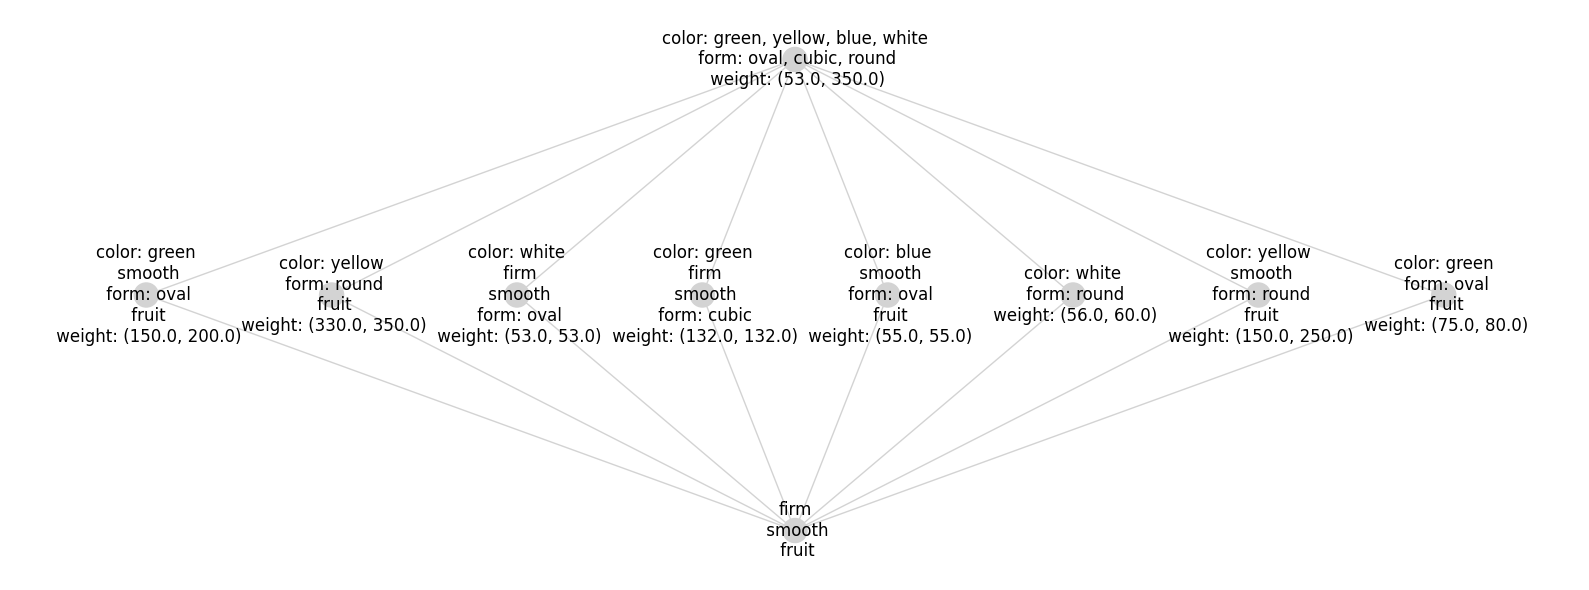

In [12]:
fig, ax = plt.subplots(figsize=(16,6))

viz = LineVizNx()
viz.draw_concept_lattice(
    L_best, ax=ax,
    node_label_func=lambda el_i, L: MK.describe_pattern(L[el_i].intent).replace(';', '\n')
)

plt.tight_layout()
plt.show()